In [68]:
import os
import matplotlib as mpl
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import join
from astropy.table import Column
import seaborn as sns

In [69]:
os.chdir(r'../Data')

Reading the Mophological and kinematical table

In [70]:
mk = Table.read('Q_Recal-L0025N0752.csv', format = 'ascii')
mk

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
406515,0.3569487017380797,0.014767278998984446,-0.1301830942449702,0.46045805760096215,0.1634719883148883,0.00930053189928316,0.011432062301116574,0.9270487039083328,406515,30,225994.12,22387073000.0,180026528.0,71087136.0,21.956575,0.009557824,423,151067.22,6.7966e-15,52443386000.0,51400712000.0,970580860.0,71870216.0,225994.12
407082,0.2622378199638741,0.1269614155092328,-0.028477331943966844,0.32392781059830245,0.19864029200304217,0.05858485316105641,0.11458291771825121,0.25057474921180545,407082,30,226461.89,16142251000.0,2384954370.0,165545152.0,23.77622,0.034616005,424,148850.12,1.852961e-08,32113649700.0,27466065900.0,4479910900.0,167445168.0,226461.89
407368,0.23368906165525494,0.30732454020377187,0.29598268499741676,0.43301127861905386,0.23400708131595763,0.16375578313199896,0.3140976407283393,0.5094761770142168,407368,30,452119.2,19893022700.0,517801248.0,110604928.0,25.084852,0.022663238,425,299351.44,1.5816843e-09,46069670000.0,44574188000.0,1382330370.0,112701416.0,452119.2
407963,0.31113343407591254,0.42404456843099614,0.6267873337265929,0.6601067033026776,0.3470915150217,0.2719122981177038,0.4044790184522194,0.6034735014823451,407963,30,233368.06,19563391000.0,1321287040.0,88128064.0,24.522423,0.017714787,426,150918.98,1.8600181e-08,45205107000.0,42723647000.0,2392557310.0,88670416.0,233368.06
408500,0.3986745596812802,-0.03680179810948214,0.2091666082938547,0.42924398808420205,0.15717877191987237,-0.013196581605613756,0.05229112336297389,0.7900301035382729,408500,30,226335.95,18955028500.0,59918720.0,45881888.0,21.377172,0.005168967,427,148601.72,1.1044998e-07,39598531000.0,38978933000.0,573230530.0,46143172.0,226335.95
409360,0.3518002050503094,0.08767395900734964,-0.25995998808845533,0.3108225154690266,0.1848687839114627,0.05836545300283374,0.11092670813985452,0.781935139117436,409360,30,225994.19,23303256100.0,555611710.0,176763968.0,27.884825,0.024263134,429,147897.72,3.2154464e-08,48766411000.0,47073087000.0,1515287170.0,177815104.0,225994.19
409724,0.1344428151093724,0.611590917475116,0.3270416902056368,0.5376755724567968,0.4874974349598883,0.46364994143822147,0.9872763153390516,0.08971921811644973,409724,30,226954.3,29059688400.0,480577856.0,621581060.0,33.90682,0.029051771,430,149078.98,6.839346e-13,48440357000.0,46783443000.0,1033040640.0,623644220.0,226954.3
410180,0.530315556825776,0.08065820004254465,0.005364751651836919,0.4884916829696485,0.17523344734976237,0.04838672024430969,0.0974160193795485,0.862386198113049,410180,30,229142.38,24260642800.0,54841656.0,92930560.0,24.825726,0.0058873105,431,149472.72,1.0557458e-09,46371598000.0,46078128000.0,199776624.0,93465152.0,229142.38
410827,0.24846418008523408,0.2668390510807581,0.3077762996290503,0.4773889118819179,0.2404201641218469,0.1595475153696804,0.29246014768187173,0.5347897018993502,410827,30,228138.23,25661575200.0,348112672.0,142847760.0,29.09137,0.010009604,432,147908.73,2.0183945e-11,48180552000.0,47416050000.0,619799100.0,144478400.0,228138.23


Reading table of luminosities

In [71]:
lu = Table.read('total_luminosities_RECA.csv', format ='ascii')
lu

GalID,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
float64,str6,float64,float64,float64,float64,float64,float64
11.0,Ref100,8.450187634229371,7.5256145616261705,7.332794018805233,6.499519055846627,6.394487963631868,5.817649210359375
6.0,Ref100,8.408184353712917,7.495340931392728,7.241338972536405,6.276553499541244,6.476954508915274,5.904120415425211
1.0,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025
4.0,Ref100,8.486389498348917,7.561499721498752,7.433742679825663,6.794526202400308,6.641563529971638,6.073023254238537
7165.0,Ref100,6.421892735076585,4.922430483063327,4.656849446909889,5.101645019101053,4.275201794723876,3.6662452767939766
4218.0,Ref100,6.9097527679986435,5.473485157441624,5.225584894137033,4.765516417527379,4.484329531191637,3.869753068480367
114.0,Ref100,7.3128993695140405,6.323854837410285,6.036992571343002,5.708932711355773,5.5350868370202475,4.963773671365811
16957.0,Ref100,6.786234163739494,4.756247658161439,4.539601741354448,5.20198438642167,3.810400935813723,3.2035042303316033
2754.0,Ref100,6.3732296390686765,4.677054129434367,4.449722018638346,4.719672450159394,3.9308498048343625,3.3184905898341914


Changing the luminosities table to a data frame and removing the data from simulation Ref-L0100N1504

In [72]:
df = lu.to_pandas()
indexNames = df[ df['Sim'] == 'Ref100' ].index
df.drop(indexNames , inplace=True)

Changing back to a astropy' table

In [73]:
lu = Table.from_pandas(df)

Joining the two tables 

In [74]:
mk_lu = join(mk,lu,keys='GalID')
mk_lu

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64
1809568,0.34388222674551716,0.025393464586648817,0.2974718996214458,0.5278080521202111,0.2234488832625949,0.014682824864777663,0.02528752169411221,0.6846548904163092,1809568,30,339743584.0,453780275000.0,5443211300.0,58857513000.0,147.6508,1.436591,1.0,360413600.0,0.00019674748,15578714600000.0,14204420500000.0,1262469510000.0,111453536000.0,372889440.0,Recal,6.999310283745709,5.558968688154772,5.23710001685355,5.714719098458671,5.221562128887422,4.623250307579788
1185365,0.25679051655481,0.329677330678525,0.41743991718562157,0.5826434799762591,0.30121438613179424,0.159927159018756,0.36922572721832403,0.39257246979284144,1185365,30,90367456.0,336599876000.0,543689340.0,71205994000.0,146.6659,0.025530169,2.0,97767096.0,4.432425e-06,10016727800000.0,8806284100000.0,1119564330000.0,90776388000.0,102345208.0,Recal,6.505945884421055,5.652842080583791,5.3208369650811775,4.438290704261847,5.302073454879694,4.7295281834042076
1230232,0.23316170156016214,0.4059094960483899,0.10812274994813564,0.5840450496081779,0.3194910731715929,0.20031870300979052,0.556246671665789,0.5380760258334389,1230232,30,91227664.0,448912163000.0,738707900.0,57717748000.0,142.26625,0.23748736,3.0,97999464.0,0.00044857574,5329336700000.0,4826635200000.0,433432232000.0,69165605000.0,103858776.0,Recal,6.230803541381562,5.215783534602246,4.880718319458195,5.119764643458,4.983923145214966,4.404495741266597
1273111,0.355957573816006,0.05139517345252187,0.4363091629976642,0.5901678704475002,0.17970560020372361,0.028764025304952243,0.046970664471139185,0.6430881550134941,1273111,30,236588128.0,371242729000.0,344076096.0,51437982000.0,134.589,0.011378701,4.0,100899144.0,0.0008318327,3889926240000.0,3704251740000.0,125157343000.0,60274926000.0,241948704.0,Recal,5.638057167870817,4.683728756373575,4.385383654273639,3.8916930673946917,4.194894759042544,3.58747373455434
1318041,0.2587776368626642,-0.04777563801065776,0.11468036504178758,0.5843911585664355,0.14178692137751084,-0.013157815884322157,0.047508825763178025,0.5939109095426238,1318041,30,61858000.0,353497121000.0,1260091520.0,51784892000.0,138.34192,0.14782065,5.0,64711692.0,2.1255055e-07,5553455100000.0,4987091900000.0,508329460000.0,57966989000.0,66880956.0,Recal,6.276242144417175,4.908513665686855,4.609733225900684,4.831360242659061,4.575760150086525,3.9631743536308366
1343568,0.5077364173445327,0.027450992608209157,-0.18737997249938587,0.6622794341170105,0.13870543656312767,0.009585298573069646,0.023449618079934457,0.8064480466081432,1343568,30,87139520.0,367008416000.0,1826331140.0,50541593000.0,124.7383,0.17997177,6.0,91437592.0,8.446476e-09,5764722700000.0,5322655700000.0,371627852000.0,70342984000.0,96615264.0,Recal,6.335244093699102,4.827667222033951,4.538341438214826,4.920966771751378,4.511983277284519,3.9045192905318684
1378064,0.46070709759442807,0.17619359449599592,0.2691476385559477,0.6112168129067082,0.2140224937167942,0.08403124308339122,0.17821728218632094,0.8909978448805032,1378064,30,282566272.0,335458304000.0,3226647300.0,32135940100.0,111.830605,0.59004754,7.0,221614608.0,0.012533081,4989283500000.0,4616050200000.0,330682204000.0,42264994000.0,286211328.0,Recal,6.790137403754924,5.6576982465865715,5.337524379245012,5.212032294282305,5.36962684570511,4.772102215950902
1397598,0.27660590343787994,0.35941736140742664,0.012764154776822356,0.24031752523188854,0.2388855777451418,0.12014928945736496,0.354775628

Cheking columns of the table

In [75]:
mk_lu.columns

<TableColumns names=('GalaxyID','DMEllipticity','DiscToTotal','DispAnisotropy','Ellipticity','KappaCoRot','MedOrbitCircu','RotToDispRatio','Triaxiality','GalaxyID_1','ApertureSize','Mass_BH','Mass_DM','Mass_Gas','Mass_Star','VelDisp','SFR','GalID','MasaANegroSubGrid','AcrecionMasaANegro','Masa','MasaMateriaOscura','MasaGas','MasaEstrella','MasaANegro','Sim','logLCII','logLNII_205','logLNII_122','logLOI_145','logLOIII_88','logLNIII_57')>

Setting the parameters to be plotted

In [76]:
mkparam=['DMEllipticity','DiscToTotal','DispAnisotropy','Ellipticity','KappaCoRot','MedOrbitCircu','RotToDispRatio','Triaxiality','VelDisp','SFR']
apparam=['Mass_BH','Mass_DM','Mass_Gas','Mass_Star']
maparam=['MasaANegroSubGrid','AcrecionMasaANegro','Masa','MasaMateriaOscura','MasaGas','MasaEstrella','MasaANegro']
luparam=['logLCII','logLNII_205','logLNII_122','logLOI_145','logLOIII_88','logLNIII_57']
colors = ['darkred', 'firebrick', 'crimson', 'red', 'orangered', 'tomato', 'coral', 'lightcoral', 'black', 'dimgrey', 'gray', 'darkgray', 'silver', 'gainsboro', 'navy', 'blue', 'slateblue', 'mediumslateblue', 'blueviolet', 'mediumorchid']

Graphing parameters vs. parameters

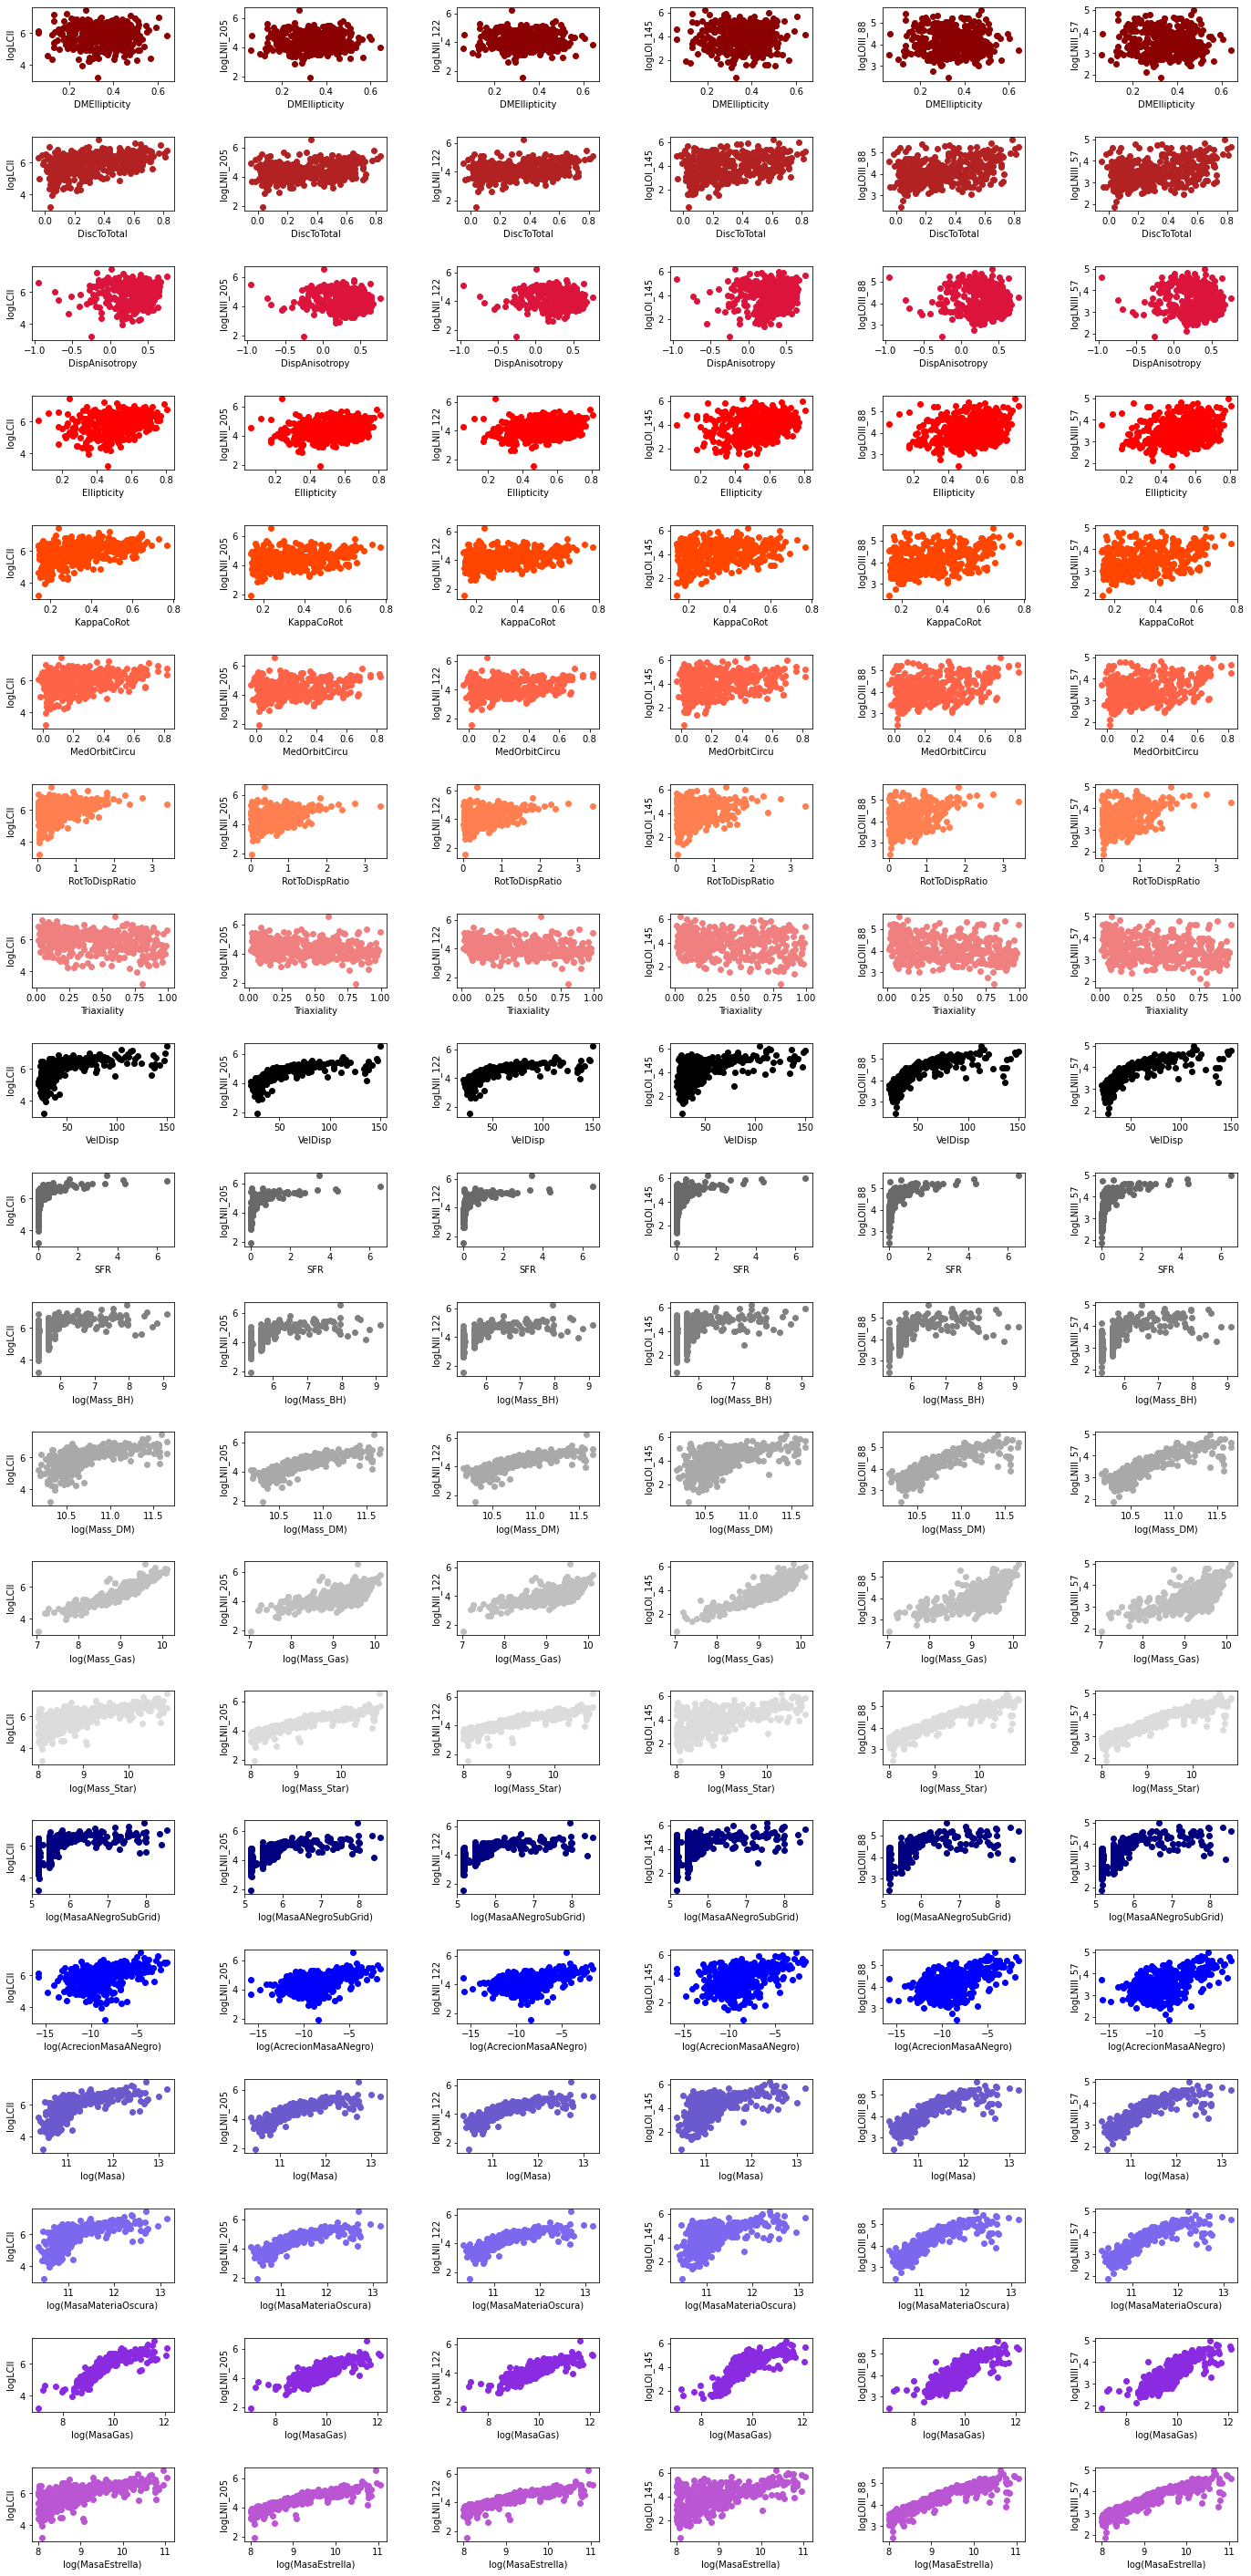

In [77]:
fig, ax = plt.subplots(20,6,figsize=(20,40), facecolor= 'white')
fig.tight_layout(pad=4)

for i_mp, mparam in enumerate(mkparam):
    for i,cparam in enumerate(colors):        
        if i==i_mp:
            for i_lp, lparam in enumerate(luparam): 
                ax[i_mp,i_lp].scatter(mk_lu[mparam], mk_lu[lparam],color=cparam)
                ax[i_mp,i_lp].set_xlabel(mparam)
                ax[i_mp,i_lp].set_ylabel(lparam)


for i_m, mparam in enumerate(apparam, start=10):
    for i,cparam in enumerate(colors):
        if i==i_m:
            for i_lp, lparam in enumerate(luparam): 
                ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam]),mk_lu[lparam],color=cparam)
                ax[i_m,i_lp].set_xlabel("log("+mparam+")")
                ax[i_m,i_lp].set_ylabel(lparam)


for i_m, mparam in enumerate(maparam, start=14):
    for i,cparam in enumerate(colors):
        if i==i_m:
            for i_lp, lparam in enumerate(luparam): 
                ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam]),mk_lu[lparam],color=cparam)
                ax[i_m,i_lp].set_xlabel("log("+mparam+")")
                ax[i_m,i_lp].set_ylabel(lparam)


In [92]:
df = mk_lu.to_pandas()
number_column = df.loc[:,'MasaEstrella']
masa=number_column.values
number_column2 = df.loc[:,'logLOIII_88']
luz=number_column2.values
x=masa.reshape((-1, 1))
y=luz
model = LinearRegression().fit(np.log10(x), y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: -3.129495867927376e+20
